# Introduction

This Notebook performs Exploratory Data Analysis (EDA) on the Forest Fires Data Set, Created by: Paulo Cortez and Aníbal Morais (Univ. Minho) @ 2007.

The aim of the EDA is to determine:
1. Day and month in which generation of forest fires was maximum.
2. Correlation among different meteorological parameters and forest fires.
3. Which meteorological parameters contribute the most towards increasing the area burned by forest fires.

## Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import seaborn as sns
import random as random

import warnings

warnings.filterwarnings("ignore")

## Reading the Forest Fires Dataset

In [2]:
dataset = pd.read_csv("forestfires.csv")

## Performing EDA on given Dataset

In [3]:
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
# Finding the shape of input dataset
dataset.shape

(517, 13)

In [5]:
# Checking out the first five rows of input dataset
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
# Checking out the last five rows of input dataset
dataset.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [7]:
# Getting the dataset description
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
# Getting Transposed dataframe 
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [9]:
# Checking dataset information for each attribute
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [10]:
# Checking for missing values in the dataset
dataset.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [11]:
# Numerical features in Forestfires dataset
num_features = [features for features in dataset.columns if dataset[features].dtypes != 'O']
print('Number of Numerical  features present in Forestfires dataset: ', len(num_features))
print('Labels of Numerical features present in Forestfires dataset: ', num_features)

Number of Numerical  features present in Forestfires dataset:  11
Labels of Numerical features present in Forestfires dataset:  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [12]:
# Categorical features in Forestfires dataset
cat_features = [features for features in dataset.columns if dataset[features].dtypes =='O']
print('Number of Categorical  features present in Forestfires dataset: ', len(cat_features))
print('Labels of Categorical features present in Forestfires dataset: ', cat_features)

Number of Categorical  features present in Forestfires dataset:  2
Labels of Categorical features present in Forestfires dataset:  ['month', 'day']


In [13]:
# Checking if dataset contains forest fire data for all months in a year
dataset['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [14]:
# Getting the number of forest fires recorded for respective months
dataset["month"].value_counts() 

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [15]:
dataset['month'].describe()

count     517
unique     12
top       aug
freq      184
Name: month, dtype: object

In [16]:
# # Checking if dataset contains forest fire data for all days in a week
dataset['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [17]:
# # Getting the number of forest fires recorded for respective days
dataset["day"].value_counts() 

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [18]:
dataset['day'].describe()

count     517
unique      7
top       sun
freq       95
Name: day, dtype: object

## Dataset Manipulation to Analyze Correlations

In [19]:
focus = 'area'
df = dataset.drop(columns=focus)

In [20]:
# Setting categorical columns
cat_col = df.select_dtypes(include='object').columns.tolist()
cat_col

['month', 'day']

In [21]:
# Setting numerical columns
num_col = df.select_dtypes(exclude='object').columns.tolist()
num_col

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

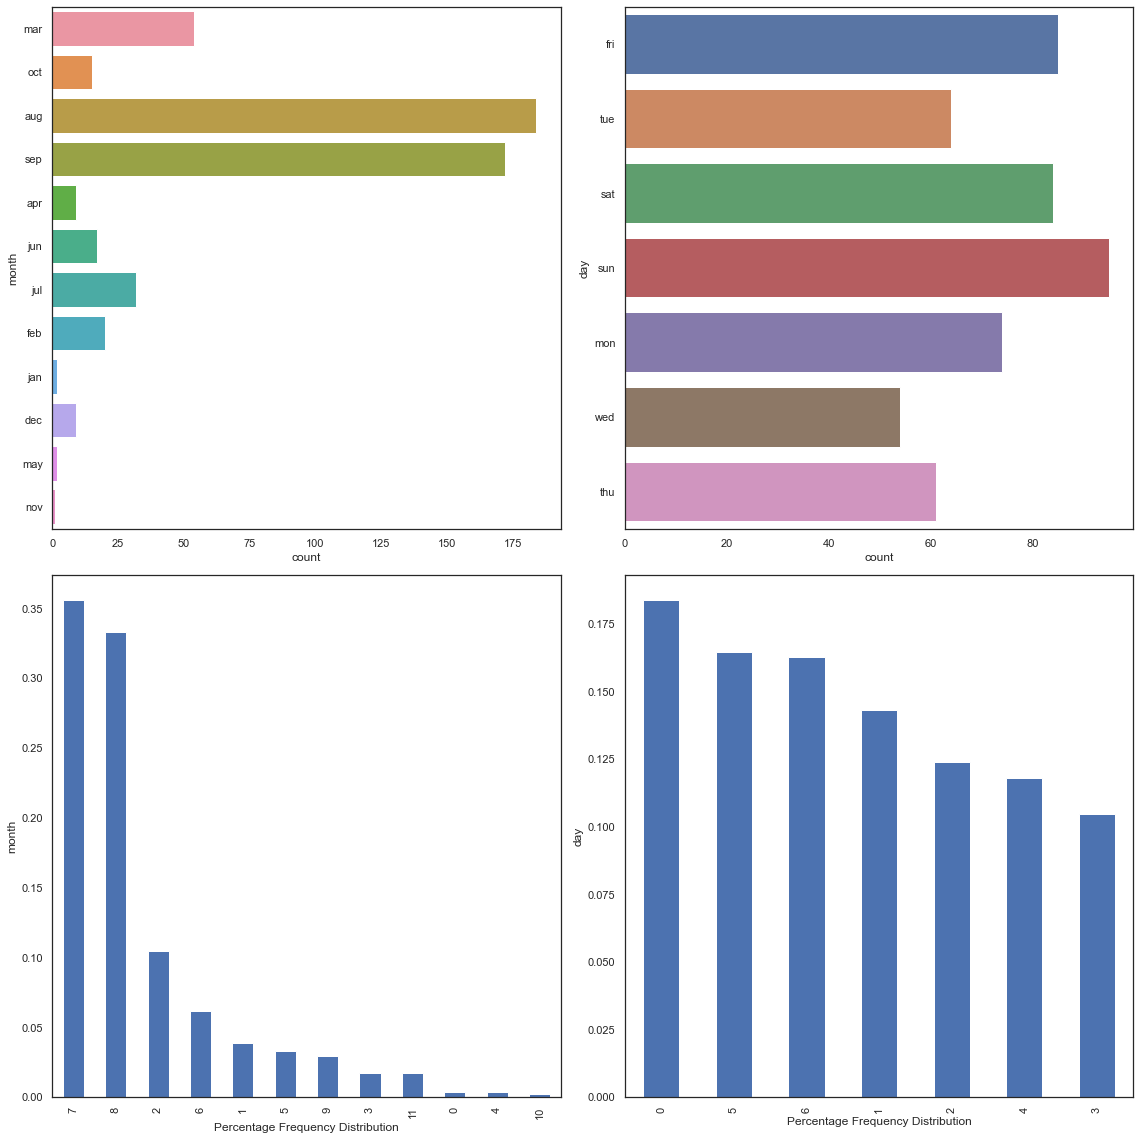

In [38]:
# Visualizing frequency of forest fires in different months and days
plt.figure(figsize=(16,16))
for i,col in enumerate(cat_col,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+2)
    dataset[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('Percentage Frequency Distribution')
plt.tight_layout()
plt.show()    

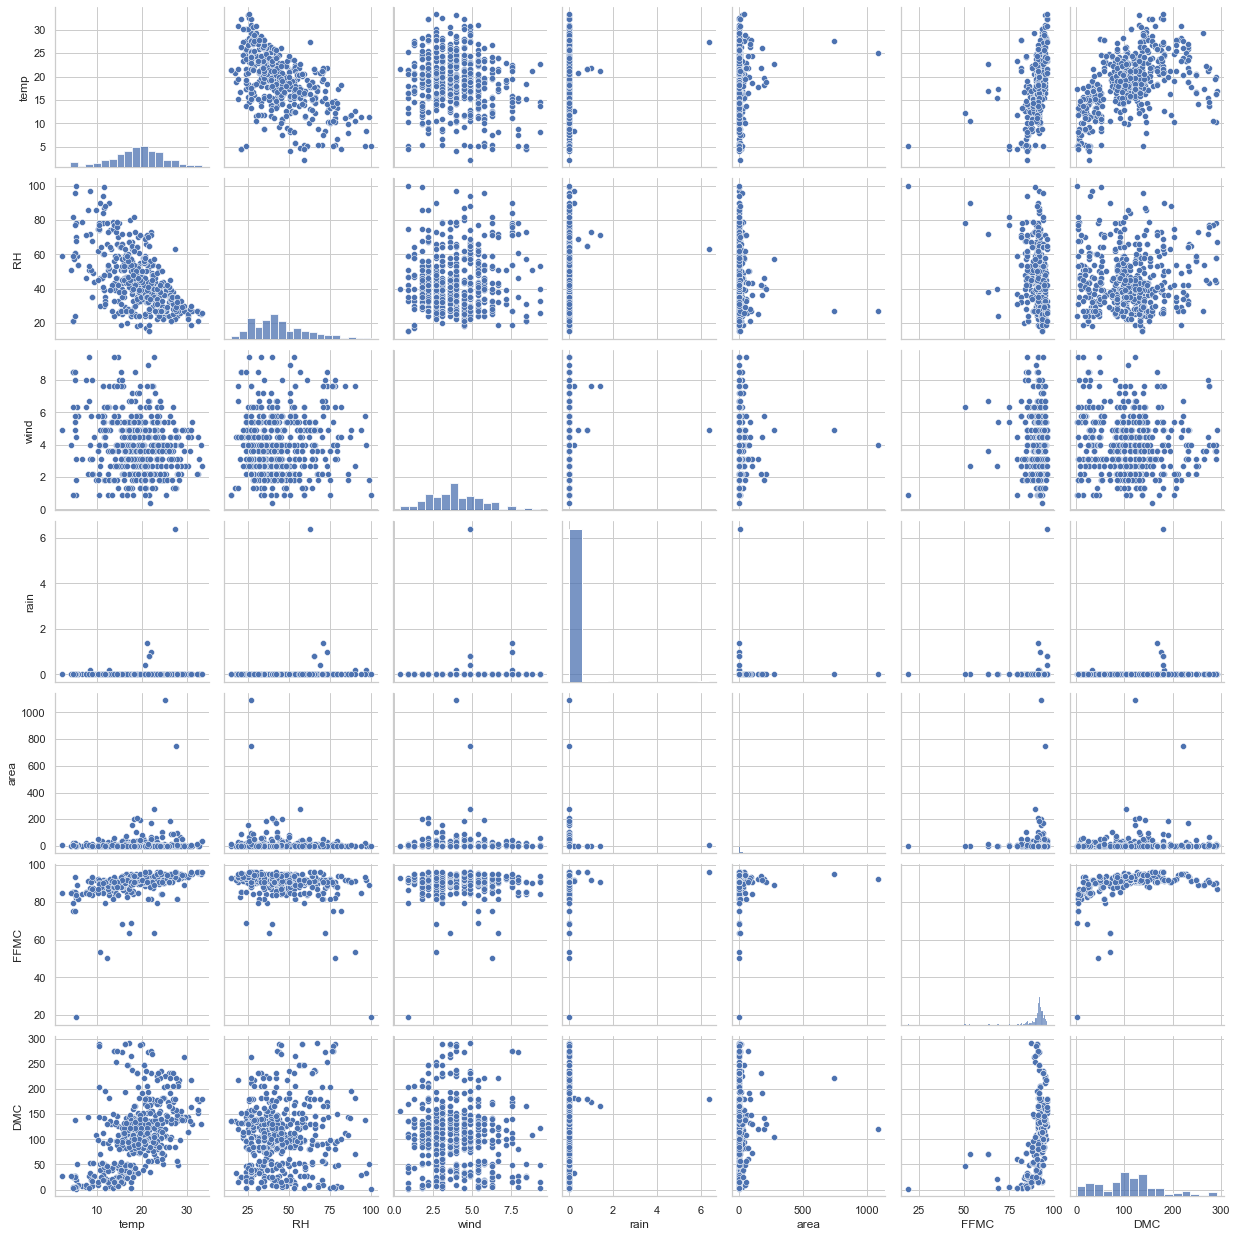

In [23]:
# Visualizing numerical data
sns.set(style='whitegrid', context='notebook')
cols = ['temp', 'RH', 'wind', 'rain','area','FFMC','DMC']
sns.pairplot(dataset[cols], size=2.5);
plt.show()

Text(0.5, 1.0, 'Diagonal Correlation Matrix')

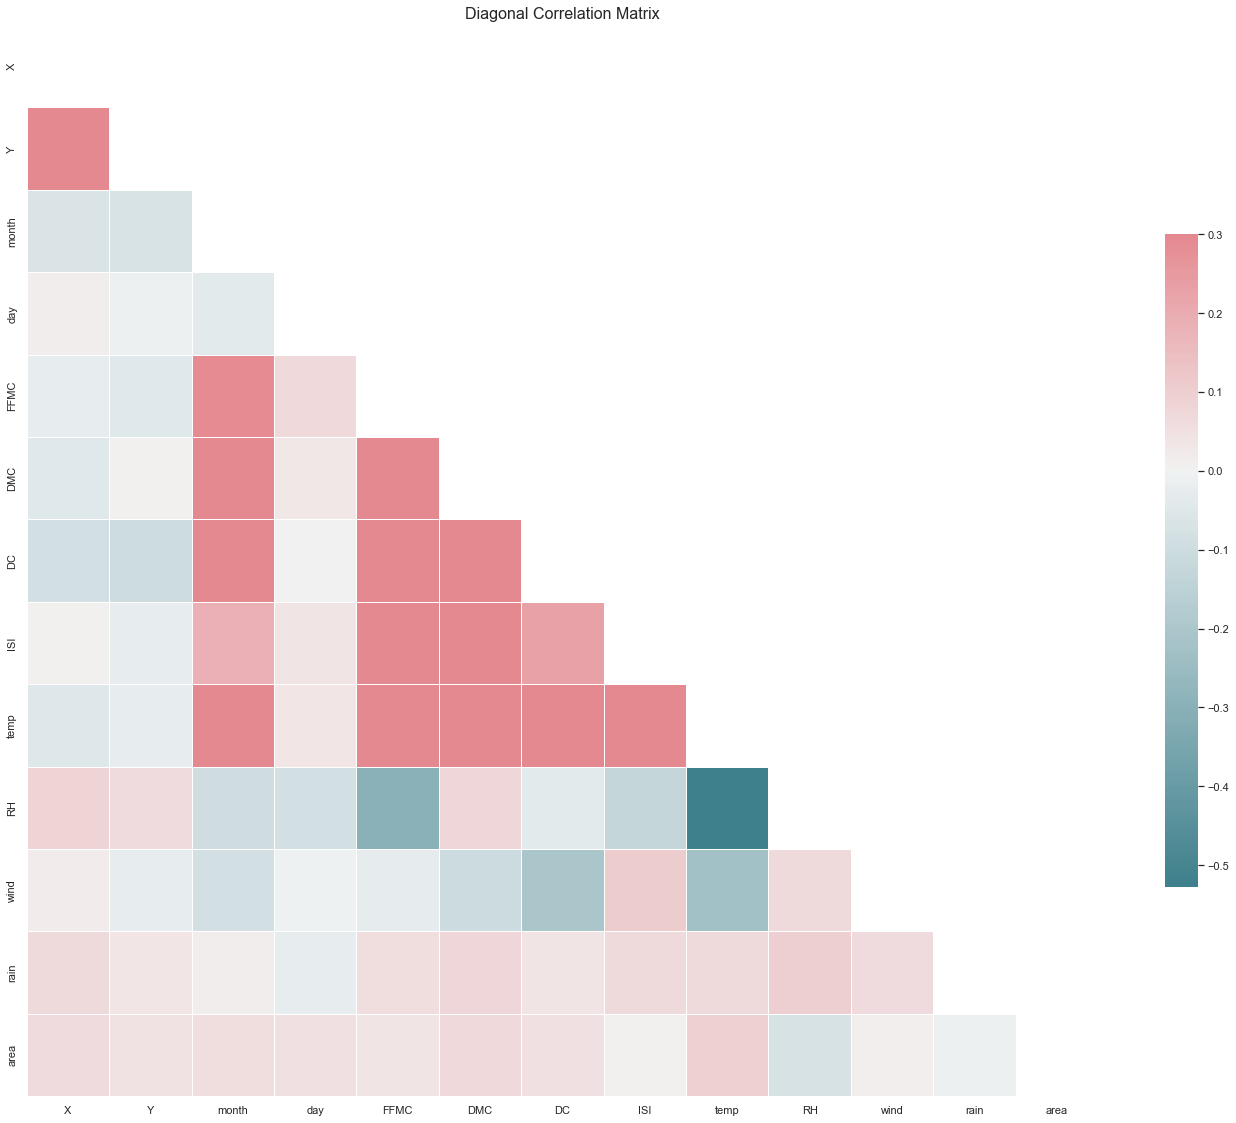

In [34]:
# Visualization using diagonal correlation matrix of numerical features

corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(210, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Diagonal Correlation Matrix', size=16)

In [25]:
# Assigning numerical labels to categorical variables

dataset['month'] = dataset['month'].map({'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11})
dataset['day'] = dataset['day'].map({'sun': 0, 'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6})

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [27]:
dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,7,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,7,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,7,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,7,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [28]:
# Using the Pearson correlation method to check the relationship between all quantitative variables

dataset.corr(method='pearson')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,0.013037,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.013085,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.037469,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,0.013037,-0.013085,-0.037469,1.000000,0.073597,0.028697,0.001913,0.035926,0.032233,-0.083318,-0.004013,-0.024119,0.048359
FFMC,-0.021039,-0.046308,0.291477,0.073597,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.028697,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.001913,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.035926,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.032233,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,-0.083318,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


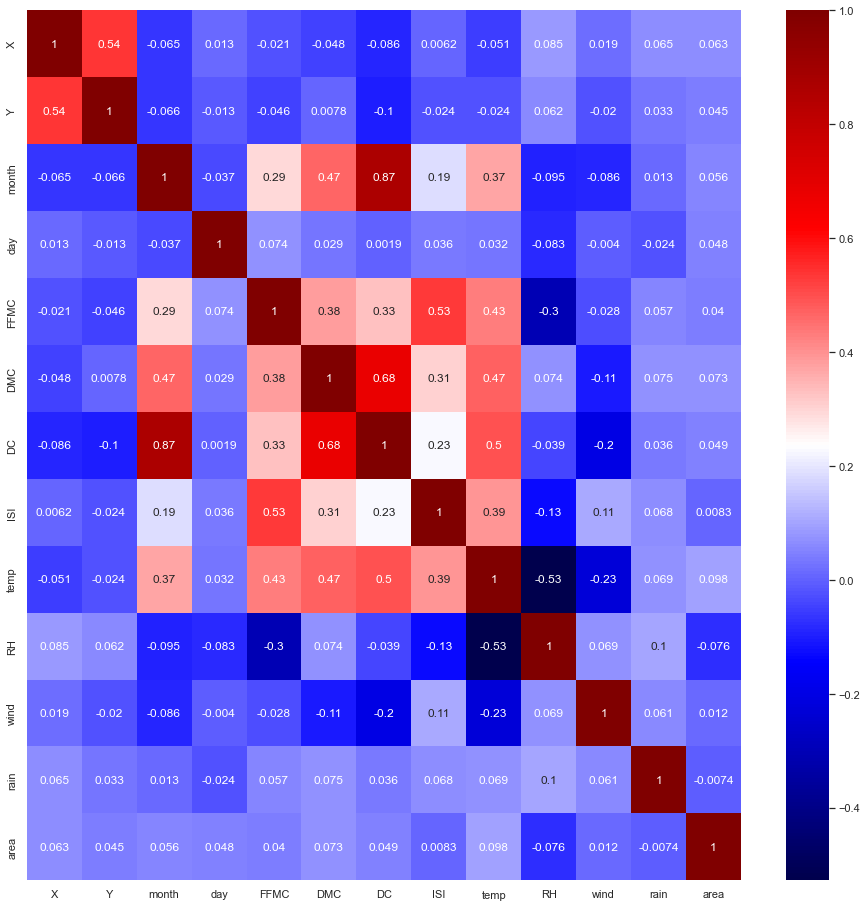

In [30]:
# Plotting a heatmap to check correlation values between all features

plt.figure(figsize =(16,16))
sns.heatmap(dataset.corr(),annot=True,cmap='seismic',cbar=True)
plt.show()

## Visualizing which Features affect Area Burned Positively/Negatively

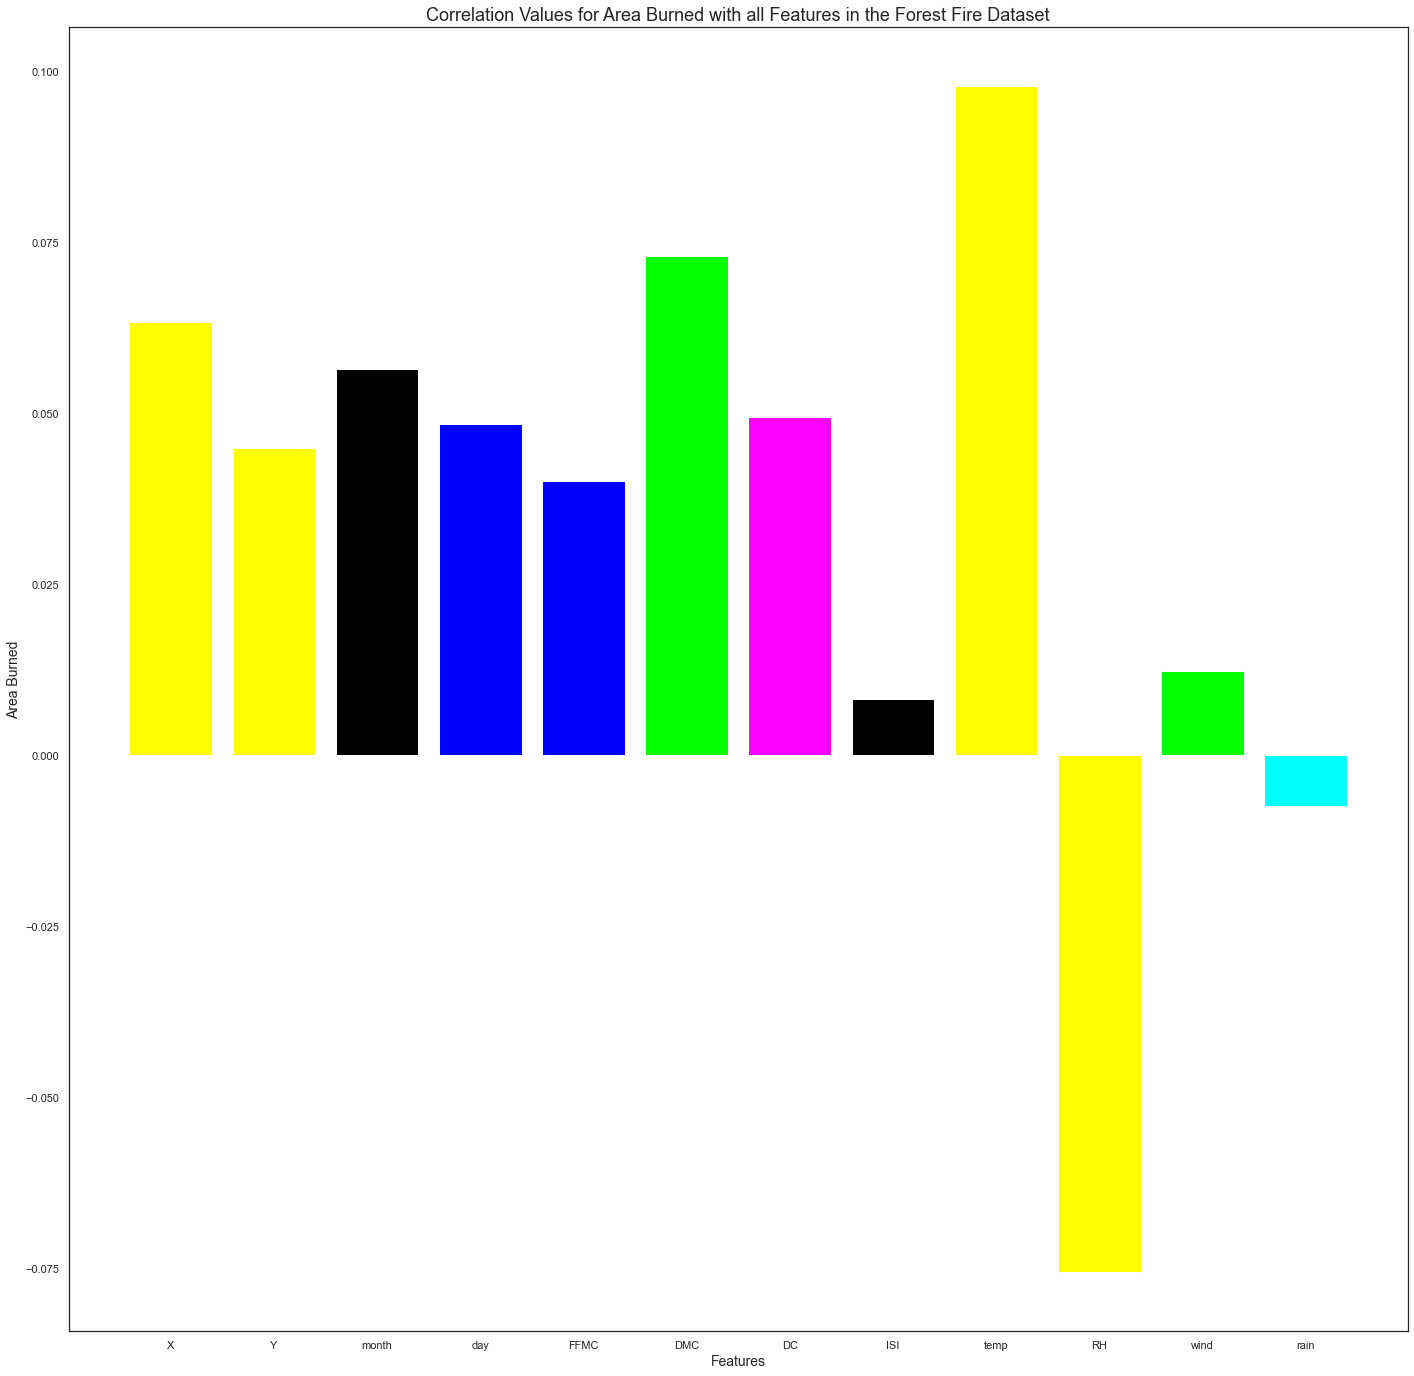

In [40]:
# Getting Area Correlation Values 
AreaCorr = np.array(dataset.corr()[['area']].values) 

# Assigning random color
rn_col = []

all_featuresCorr = AreaCorr[:,0][:-1] 
all_features = ['X','Y','month','day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

for i in range(0, len(all_features)+1):
    rn_col.append(tuple(np.random.choice(range(0, 2), size=3)))

plt.bar(all_features, all_featuresCorr, color = rn_col)
plt.ylabel('Area Burned', size = 14)
plt.xlabel('Features', size = 14)
plt.title('Correlation Values for Area Burned with all Features in the Forest Fire Dataset', size = 18)
plt.rcParams["figure.figsize"] = (24, 24)
plt.show()

## Conclusions

1. Day and month in which generation of forest fires was maximum:
Most forest fires occurred in the month August and on Sundays, followed by Friday and Saturday. Numerous literatures have reported that more than 85% of forest fires are caused by human activity, so this result may also be linked to that, since people often go for camping or other activities during weekends.

2. Correlation among different meteorological parameters and forest fires:
Temperature, month, FFMC, DMC, DC, ISI have strong correlations with each other.

3. Which meteorological parameters contribute the most towards increasing the area burned by forest fires:
Area burned due to forest fires are the most positively impacted by temperature and negatively impacted by relative humidity and rain.